# Happiness: A Measure of Resilience During Times of COVID-19

In [1]:
#Importing dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

#Importing useful functions that we've written beforehand
from functions import regressionLine, scatterDraw, stateGrouper, boxDraw, runAnova

## After having merged and cleaned our data, we read our saved csv into a dataframe

In [2]:
master_df = pd.read_csv('resources/MasterData200730.csv')
master_df = master_df.dropna()
master_df.head()

,State,Abv,Date,Tested,Positive,Deaths,Mortality Rate,Happiness Rank,totalScore,Emotional/Physical Rank,Work Enviroment Rank,Community Enviroment Rank,Happiness Rank Inv,Emotional/Physical Rank Inv,Work Enviroment Rank Inv,Community Enviroment Rank Inv,State Population
0,Alaska,AK,2020-07-25 07:10:21,200572.0,1693.0,19.0,1.122268,47.0,38.21,33.0,49.0,50.0,3.0,17.0,1.0,0.0,738516.0
1,Alabama,AL,2020-07-25 07:10:21,627344.0,74365.0,1395.0,1.875882,45.0,39.35,46.0,39.0,43.0,5.0,4.0,11.0,7.0,4864680.0
2,Arkansas,AR,2020-07-22 05:16:54,439635.0,34655.0,374.0,1.079209,49.0,36.61,50.0,29.0,23.0,1.0,0.0,21.0,27.0,2990671.0
3,Arizona,AZ,2020-07-25 07:23:41,1053832.0,156301.0,3142.0,2.010224,21.0,52.92,27.0,12.0,34.0,29.0,23.0,38.0,16.0,6946685.0
4,California,CA,2020-07-25 07:23:41,6915876.0,435334.0,8186.0,1.880395,5.0,63.14,4.0,24.0,12.0,45.0,46.0,26.0,38.0,39148760.0


# Data Visualized
## Scatterplots with Regression
<ul>
Weak correlations as displayed by the flatness of the regression lines<br>
Low R-squared values showing a lot of variance in the data
</ul>

R-squared: 0.099553


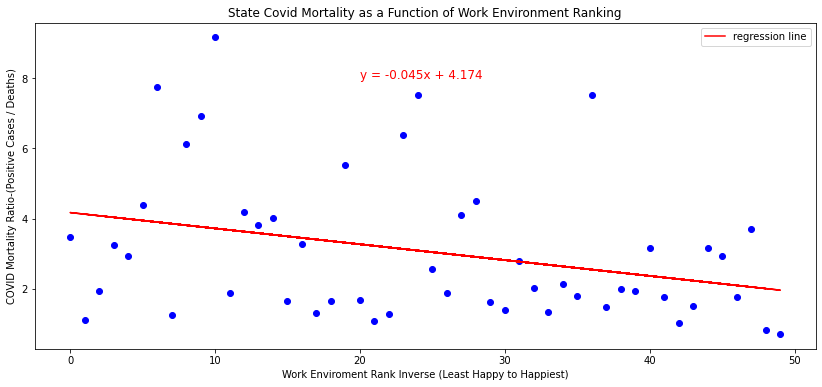

In [3]:
scatterDraw("Work Enviroment Rank Inv", "Mortality Rate", master_df, 'blue',
            "State Covid Mortality as a Function of Work Environment Ranking")
regressionLine(master_df["Work Enviroment Rank Inv"], 
            master_df["Mortality Rate"], 20, 8)
plt.show()

R-squared: 0.049195


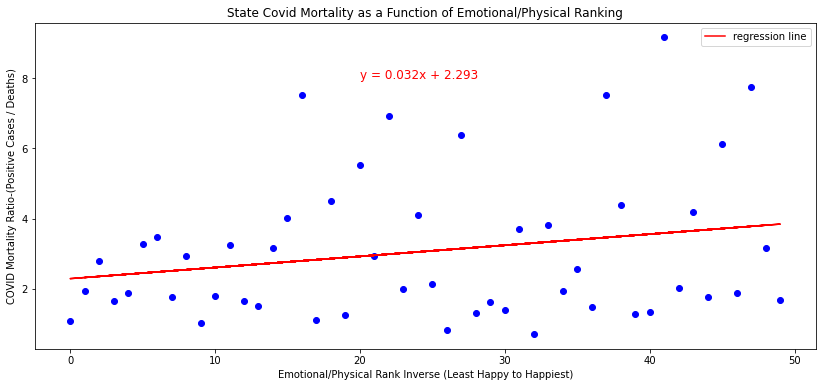

In [4]:
scatterDraw("Emotional/Physical Rank Inv", "Mortality Rate", master_df, 'blue', 
            "State Covid Mortality as a Function of Emotional/Physical Ranking")
regressionLine(master_df["Emotional/Physical Rank Inv"], 
            master_df["Mortality Rate"], 20, 8)
plt.show()

R-squared: 0.023049


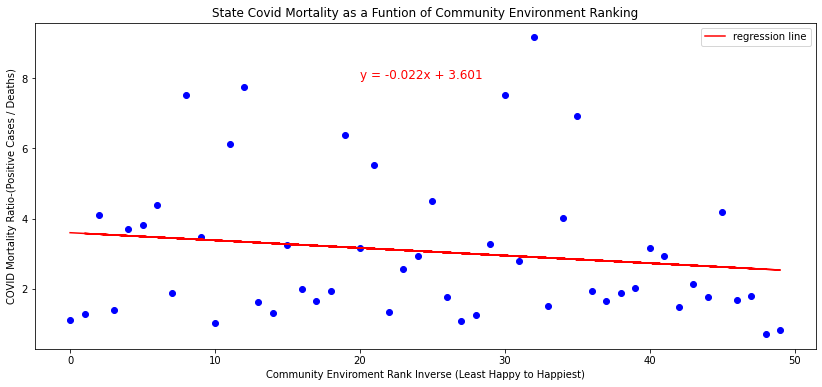

In [5]:
scatterDraw("Community Enviroment Rank Inv",  "Mortality Rate", master_df, 'blue', 
            "State Covid Mortality as a Funtion of Community Environment Ranking")
regressionLine(master_df['Community Enviroment Rank Inv'], 
            master_df["Mortality Rate"], 20, 8)
plt.show()

## Bin data with grouping function
<ul>
    Use function to cut states into groups by each happiness criteria<br>
    Groups will be used to draw boxplots and statistical tests
</ul>

In [6]:
#Function will sort and split into groups based on field passed to the function
#Also, this is flexible to change the number of state groups by changing the bin_number variable

bin_number = 5
master_df = stateGrouper('Emotional/Physical Rank', bin_number, master_df)
master_df = stateGrouper('Work Enviroment Rank', bin_number, master_df)
master_df = stateGrouper('Community Enviroment Rank', bin_number, master_df)
master_df.head()

,State,Abv,Date,Tested,Positive,Deaths,Mortality Rate,Happiness Rank,totalScore,Emotional/Physical Rank,Work Enviroment Rank,Community Enviroment Rank,Happiness Rank Inv,Emotional/Physical Rank Inv,Work Enviroment Rank Inv,Community Enviroment Rank Inv,State Population,Emotional/Physical Rank_bin,Work Enviroment Rank_bin,Community Enviroment Rank_bin
1,Idaho,ID,2020-07-25 07:10:21,62642.0,17264.0,144.0,0.834106,6.0,63.09,24.0,2.0,1.0,44.0,26.0,48.0,49.0,1687809.0,3,1,1
2,Utah,UT,2020-07-22 05:16:54,561500.0,35012.0,251.0,0.716897,2.0,67.84,18.0,1.0,2.0,48.0,32.0,49.0,48.0,3045350.0,2,1,1
3,Nevada,NV,2020-07-22 05:16:54,503464.0,37528.0,676.0,1.801322,26.0,51.80,40.0,15.0,3.0,24.0,10.0,35.0,47.0,2922849.0,4,2,1
4,Hawaii,HI,2020-07-22 05:16:54,108182.0,1418.0,24.0,1.692525,1.0,68.27,1.0,30.0,4.0,49.0,49.0,20.0,46.0,1422029.0,1,3,1
5,Maryland,MD,2020-07-25 07:10:21,804350.0,81766.0,3422.0,4.185114,7.0,61.78,7.0,38.0,5.0,43.0,43.0,12.0,45.0,6003435.0,1,4,1


## Boxplot visualization
<ul>
    Medians relatively close in value<br>
    Outliers found with large variance in some groupings.
</ul>

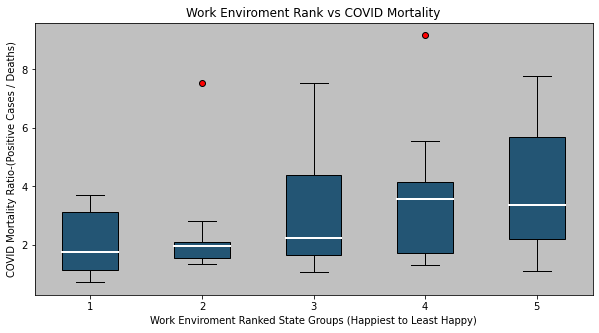

In [7]:
#This will draw the boxplots for any previously binned collection of data at the field level.
box = boxDraw('Work Enviroment Rank', bin_number, master_df)
plt.show()

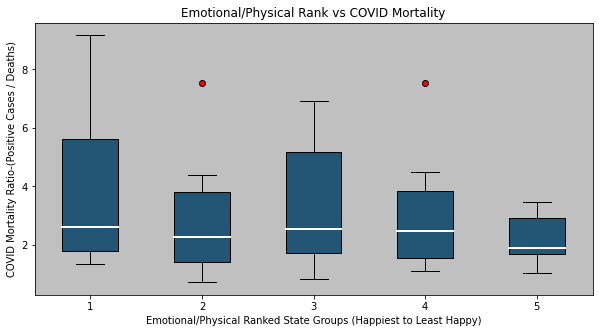

In [8]:
box2 = boxDraw('Emotional/Physical Rank', bin_number, master_df)
plt.show()

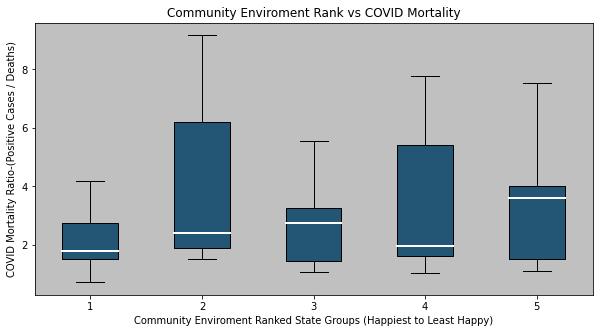

In [9]:
box3 = boxDraw('Community Enviroment Rank', bin_number, master_df)
plt.show()

# Statistical Analysis
### Hypothesis: A state's happiness ranking can be used to predict its resilience to COVID-19 
### Null Hypothesis: A state's happiness ranking has no effect on its resilience to COVID-19

## ANOVA test using runAnova function

In [10]:
anova_Emot =  runAnova(master_df,'Emotional/Physical Rank_bin','Mortality Rate')
anova_Work =  runAnova(master_df,'Work Enviroment Rank_bin','Mortality Rate')
anova_Comm =  runAnova(master_df,'Community Enviroment Rank_bin','Mortality Rate')

print(f'''
ANOVA test for Emotional/Physical Rank is {anova_Emot}\n
ANOVA test for Work Enviroment Rank is {anova_Work}\n
ANOVA test for Community Enviroment Rank is {anova_Comm}
''')



ANOVA test for Emotional/Physical Rank is F_onewayResult(statistic=0.9264863889700765, pvalue=0.45706090546985567)

ANOVA test for Work Enviroment Rank is F_onewayResult(statistic=1.4980634940951136, pvalue=0.21878641441598728)

ANOVA test for Community Enviroment Rank is F_onewayResult(statistic=1.1498652653037795, pvalue=0.3455511320580993)



### For all measures of happiness, the p-values is greater than 0.05
### There is insufficient evidence to warrant rejection of the null hypothesis